Load all the libraries and set colors

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

cmap = 'magma_r'

import xesmf as xe

Load the data files and update metadata

In [2]:
fin_surfdata = xr.open_dataset('CLM5_current_surf_deg025.nc')
fin_pasturedata = xr.open_dataset('CLM5_current_luhpasture_deg025.nc')
fin_otherdata = xr.open_dataset('CLM5_current_luhother_deg025.nc')
fin_forestdata = xr.open_dataset('CLM5_current_luhforest_deg025.nc')

fin_surfdata['lon'] = fin_surfdata.lon * 0.25 - 180. + 1./8.
fin_surfdata['lat'] = fin_surfdata.lat * 0.25 - 90. + 1./8.

fin_pasturedata['lon'] = fin_pasturedata.lon * 0.25 - 180. + 1./8.
fin_pasturedata['lat'] = fin_pasturedata.lat * 0.25 - 90. + 1./8.

fin_otherdata['lon'] = fin_otherdata.lon * 0.25 - 180. + 1./8.
fin_otherdata['lat'] = fin_otherdata.lat * 0.25 - 90. + 1./8.

fin_forestdata['lon'] = fin_forestdata.lon * 0.25 - 180. + 1./8.
fin_forestdata['lat'] = fin_forestdata.lat * 0.25 - 90. + 1./8.

fin_surfdata['PCT_NAT_PFT'] = fin_surfdata['PCT_NAT_PFT'].assign_attrs({'long_name':'PFT percentage, CLM5_current_surf_deg025.nc'})


Load static data for land/ocean mask and forest/non-forest mask

In [3]:
luh2_staticdata = xr.open_dataset('../staticData_quarterdeg.nc')
landoceanmask = (1.-luh2_staticdata.icwtr) / (1.-luh2_staticdata.icwtr)

Calculate the bare-ground fraction from the surface data file and remove the bare-ground fraction from the forest, pasture, and other PFT datasets, so that each of them sum to 100% of the non-bare-ground fraction.

In [4]:
bareground_percent = fin_surfdata.PCT_NAT_PFT.isel(natpft=0) * landoceanmask

forest_pft_percent = fin_forestdata.PCT_NAT_PFT.isel(natpft=slice(1,None)) / fin_forestdata.PCT_NAT_PFT.isel(natpft=slice(1,None)).sum(dim='natpft') * 100. * landoceanmask

pasture_pft_percent = fin_pasturedata.PCT_NAT_PFT.isel(natpft=slice(1,None)) / fin_pasturedata.PCT_NAT_PFT.isel(natpft=slice(1,None)).sum(dim='natpft') * 100. * landoceanmask
other_pft_percent = fin_otherdata.PCT_NAT_PFT.isel(natpft=slice(1,None)) / fin_otherdata.PCT_NAT_PFT.isel(natpft=slice(1,None)).sum(dim='natpft') * 100. * landoceanmask

current_surfdata_percent = fin_surfdata.PCT_NAT_PFT.isel(natpft=slice(1,None)) / fin_surfdata.PCT_NAT_PFT.isel(natpft=slice(1,None)).sum(dim='natpft') * 100. * landoceanmask


Calculate the primary and secondary PFT fractions as the forest- and nonforest-weighted averages of the forest and other PFT datasets.

In [5]:
primary_secondary_percent = luh2_staticdata.fstnf * forest_pft_percent + (1.- luh2_staticdata.fstnf) * other_pft_percent

Make a map of the bare ground fraction

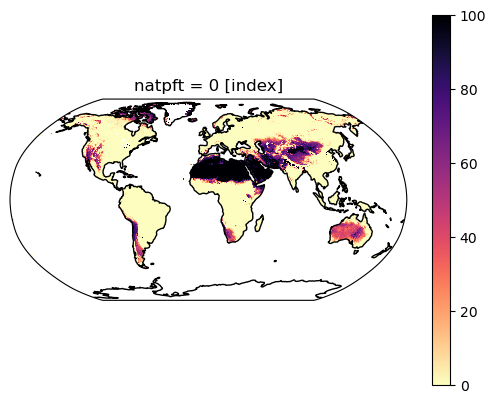

In [6]:
ax = plt.subplot(projection=ccrs.Robinson())

bareground_percent.plot(cmap=cmap, transform=ccrs.PlateCarree())
ax.coastlines()

Make a map of the primary and secondary land PFT fractions

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_40680/4173017881.py:3: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in fg.axes.flat:


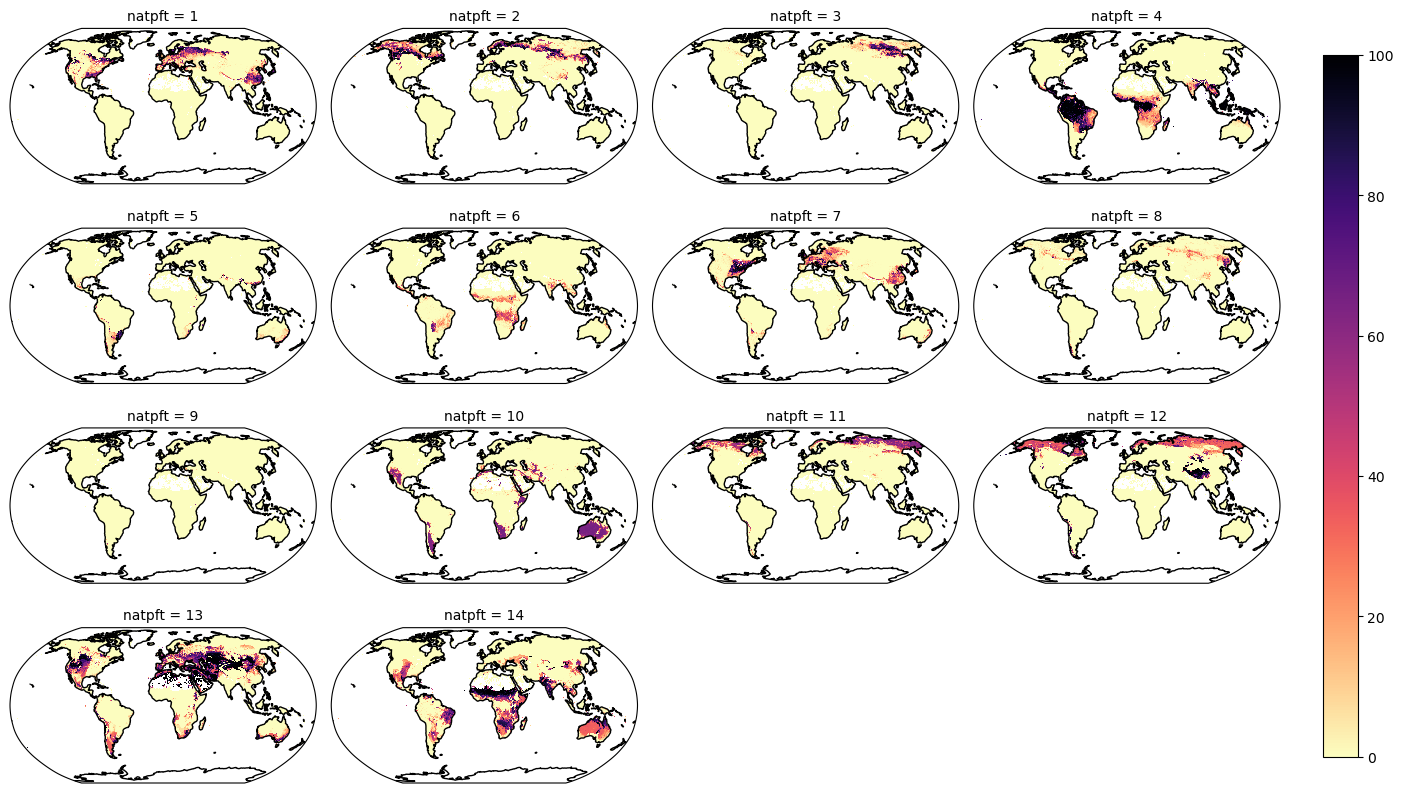

In [7]:
fg = primary_secondary_percent.plot(x='lon',y='lat',col='natpft', col_wrap=4, cmap=cmap, transform=ccrs.PlateCarree(), subplot_kws=dict(projection=ccrs.Robinson()), add_colorbar=False)

for ax in fg.axes.flat:
    ax.coastlines() 

# color bar
#fg.add_colorbar(orientation="horizontal", shrink=0.5, anchor=(0.5, -0.5))
fg.add_colorbar(orientation="vertical", shrink=0.6, anchor=(1.5, 0.5))

plt.subplots_adjust(hspace=-0.65)


Make a map of the pasture land PFT fractions

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_40680/4172619223.py:3: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in fg.axes.flat:


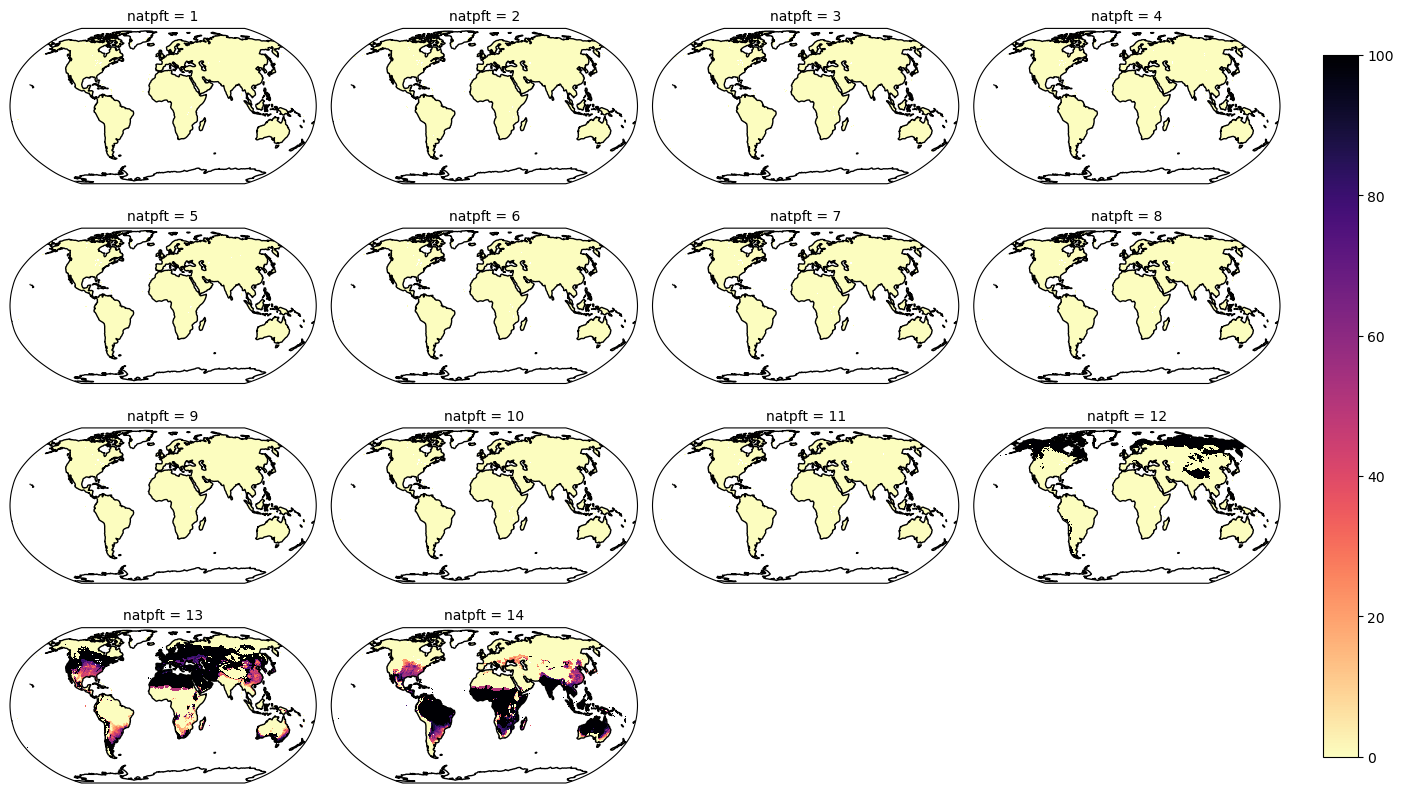

In [8]:
fg = pasture_pft_percent.plot(x='lon',y='lat',col='natpft', col_wrap=4, cmap=cmap, transform=ccrs.PlateCarree(), subplot_kws=dict(projection=ccrs.Robinson()), add_colorbar=False)

for ax in fg.axes.flat:
    ax.coastlines() 

# color bar
#fg.add_colorbar(orientation="horizontal", shrink=0.5, anchor=(0.5, -0.5))
fg.add_colorbar(orientation="vertical", shrink=0.6, anchor=(1.5, 0.5))

plt.subplots_adjust(hspace=-0.65)


Make a map of the rangeland PFT fractions

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_40680/1479862244.py:3: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in fg.axes.flat:


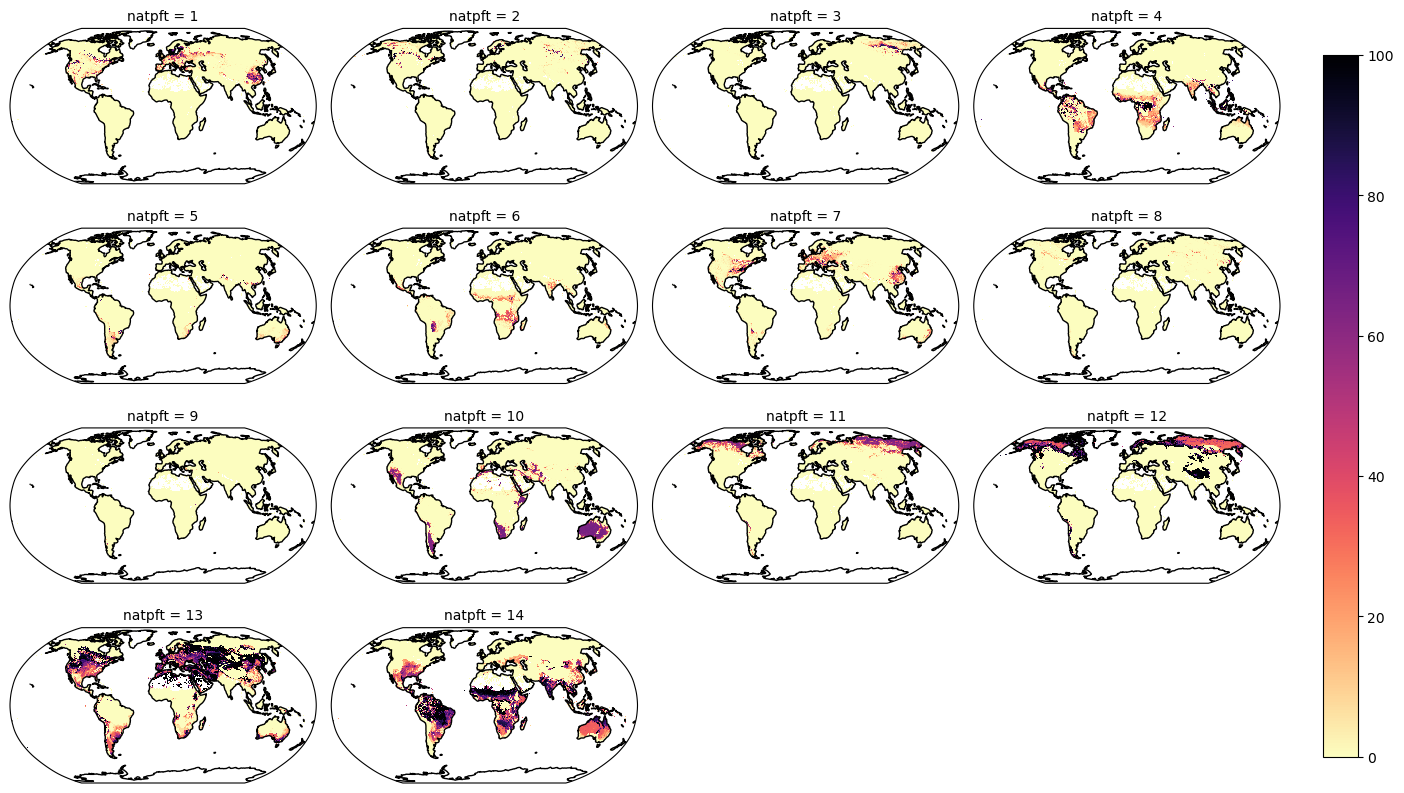

In [9]:
fg = other_pft_percent.plot(x='lon',y='lat',col='natpft', col_wrap=4, cmap=cmap, transform=ccrs.PlateCarree(), subplot_kws=dict(projection=ccrs.Robinson()), add_colorbar=False)

for ax in fg.axes.flat:
    ax.coastlines() 
    

# color bar
#fg.add_colorbar(orientation="horizontal", shrink=0.5, anchor=(0.5, -0.5))
fg.add_colorbar(orientation="vertical", shrink=0.6, anchor=(1.5, 0.5))

plt.subplots_adjust(hspace=-0.65)


Ensure that the primary and secondary sum to 100% (i.e. it is the fraction of non-bare-ground area)

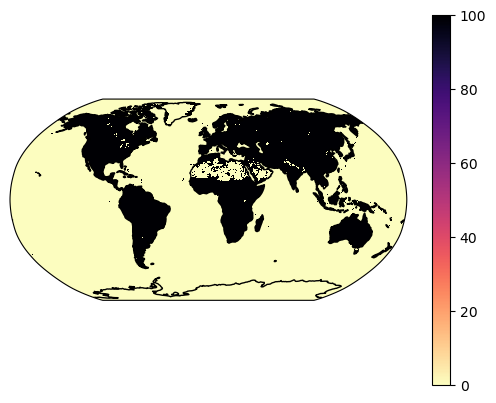

In [10]:
ax = plt.subplot(projection=ccrs.Robinson())

primary_secondary_percent.sum(dim='natpft').plot(cmap=cmap, transform=ccrs.PlateCarree())
ax.coastlines()

Ensure that the rangeland sum to 100% (i.e. it is the fraction of non-bare-ground area)

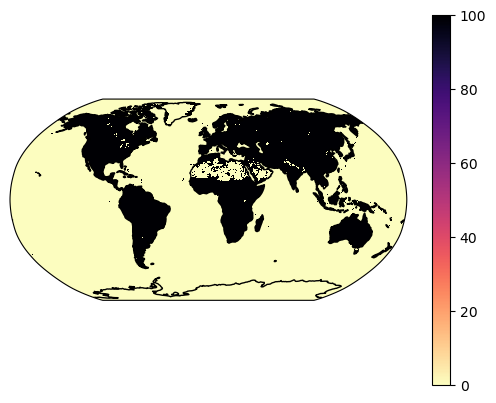

In [11]:
ax = plt.subplot(projection=ccrs.Robinson())

other_pft_percent.sum(dim='natpft').plot(cmap=cmap, transform=ccrs.PlateCarree())
ax.coastlines()

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_40680/197952380.py:3: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in fg.axes.flat:


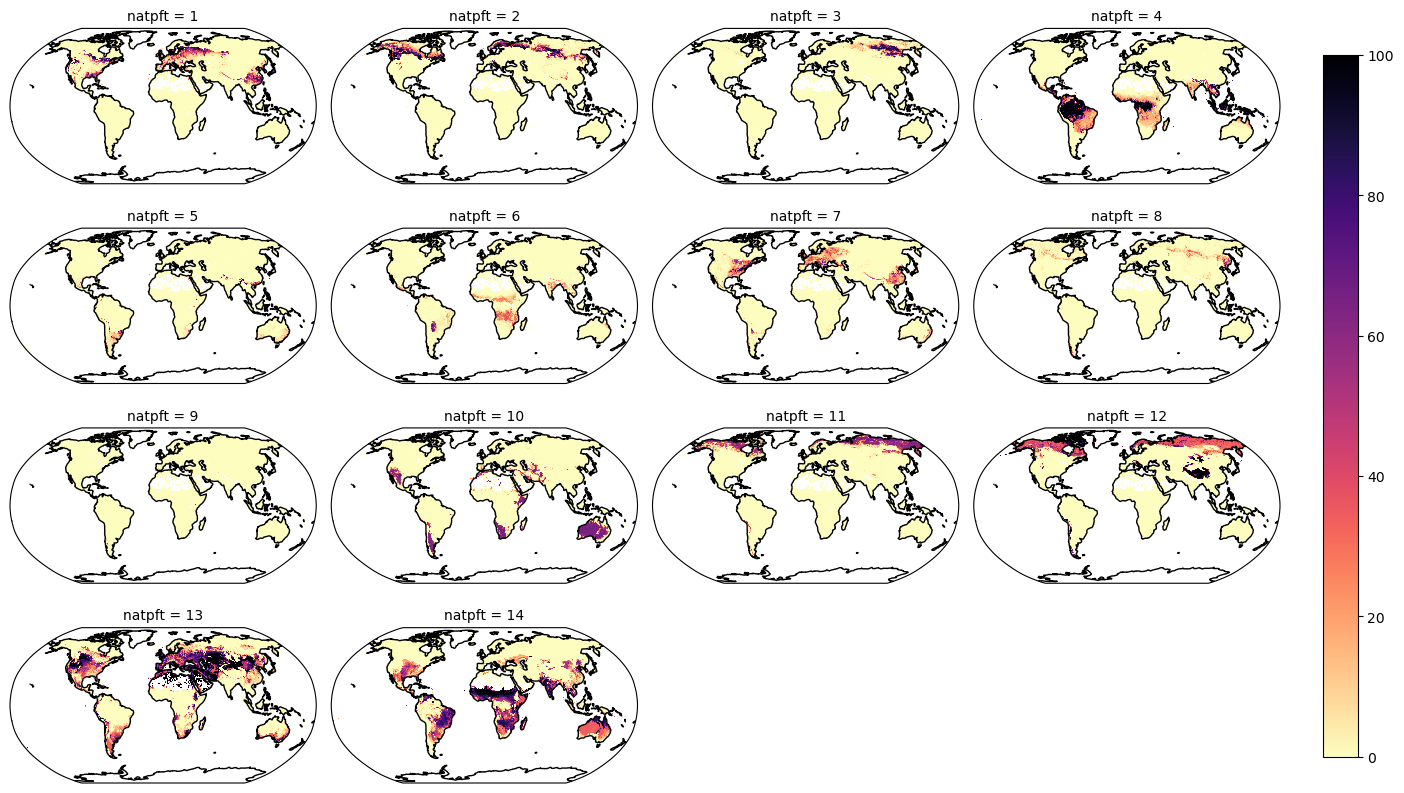

In [12]:
fg = current_surfdata_percent.plot(x='lon',y='lat',col='natpft', col_wrap=4, cmap=cmap, transform=ccrs.PlateCarree(), subplot_kws=dict(projection=ccrs.Robinson()), add_colorbar=False)

for ax in fg.axes.flat:
    ax.coastlines() 
    

# color bar
#fg.add_colorbar(orientation="horizontal", shrink=0.5, anchor=(0.5, -0.5))
fg.add_colorbar(orientation="vertical", shrink=0.6, anchor=(1.5, 0.5))

plt.subplots_adjust(hspace=-0.65)


In [13]:
potential_minus_present = primary_secondary_percent - current_surfdata_percent

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_40680/280475084.py:3: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in fg.axes.flat:


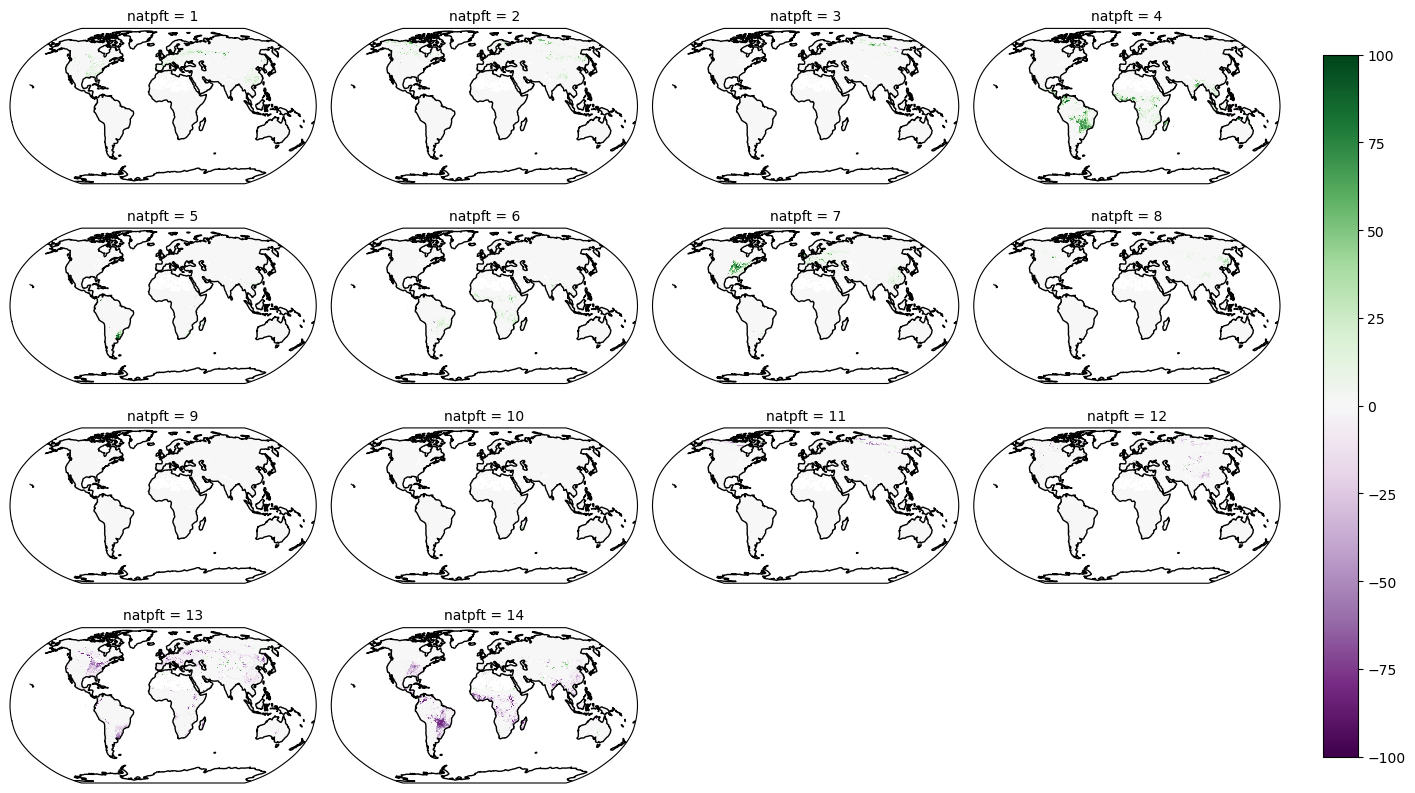

In [14]:
fg = potential_minus_present.plot(x='lon',y='lat',col='natpft', col_wrap=4, cmap='PRGn', transform=ccrs.PlateCarree(), subplot_kws=dict(projection=ccrs.Robinson()), add_colorbar=False)

for ax in fg.axes.flat:
    ax.coastlines() 
    

# color bar
#fg.add_colorbar(orientation="horizontal", shrink=0.5, anchor=(0.5, -0.5))
fg.add_colorbar(orientation="vertical", shrink=0.6, anchor=(1.5, 0.5))

plt.subplots_adjust(hspace=-0.65)


### regrid the datasets

In [15]:
luh2_static_file = xr.open_dataset('/Users/CDKoven/datasets/luh2/needed_data_for_files/staticData_quarterdeg.nc')
clm_target_surfdata_file = xr.open_dataset('/Users/CDKoven/datasets/luh2/surfdata_4x5_hist_16pfts_Irrig_CMIP6_simyr2000_c190214.nc')


In [16]:
## make separate datsets for each set of things that need to be regridded.

pasture_pft_percent_dataset = pasture_pft_percent.to_dataset(name='pasture_pft_percent')
range_pft_percent_dataset = other_pft_percent.to_dataset(name='range_pft_percent')
primary_secondary_pft_percent_dataset = primary_secondary_percent.to_dataset(name='primary_secondary_pft_percent')

bareground_dataset = bareground_percent.to_dataset(name='bareground')

In [17]:
pasture_pft_percent_dataset

<xarray.Dataset>
Dimensions:              (natpft: 14, lon: 1440, lat: 720)
Coordinates:
  * natpft               (natpft) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * lon                  (lon) float64 -179.9 -179.6 -179.4 ... 179.6 179.9
  * lat                  (lat) float64 -89.88 -89.62 -89.38 ... 89.62 89.88
Data variables:
    pasture_pft_percent  (natpft, lat, lon) float32 nan nan nan ... nan nan nan

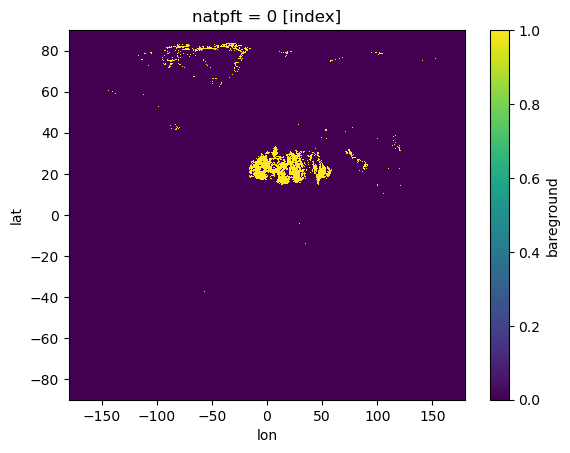

In [18]:
mask_allbareground = (bareground_dataset['bareground'] == 100.)
mask_allbareground.plot()

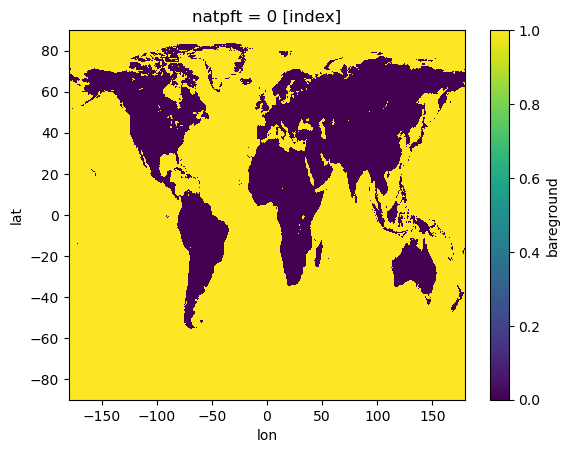

In [19]:
mask_baregroundnan = np.isnan(bareground_dataset['bareground'])
mask_baregroundnan.plot()

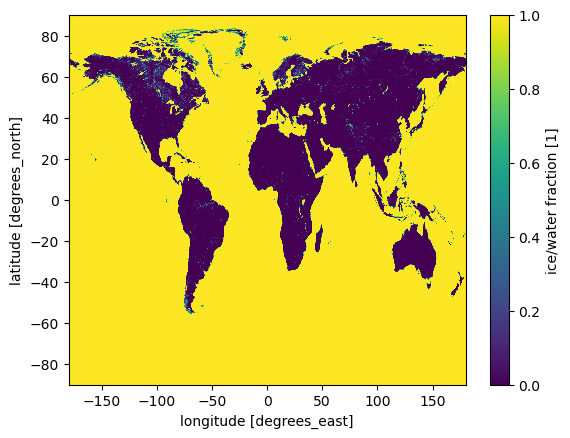

In [20]:
icewatermask = luh2_static_file['icwtr']
icewatermask.plot()

In [21]:
bareground_dataset['mask'] = (1 - icewatermask) * (1 - mask_baregroundnan)

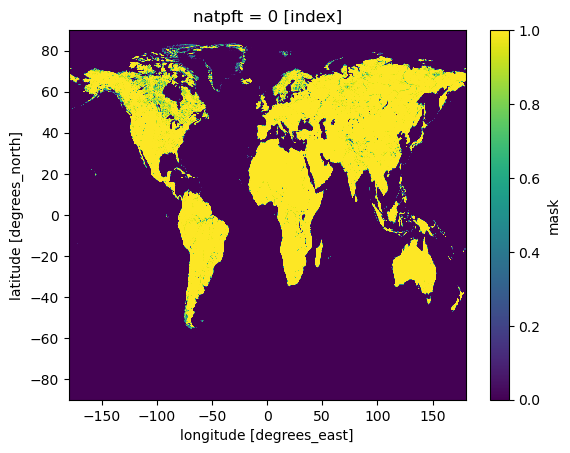

In [22]:
bareground_dataset['mask'].plot()

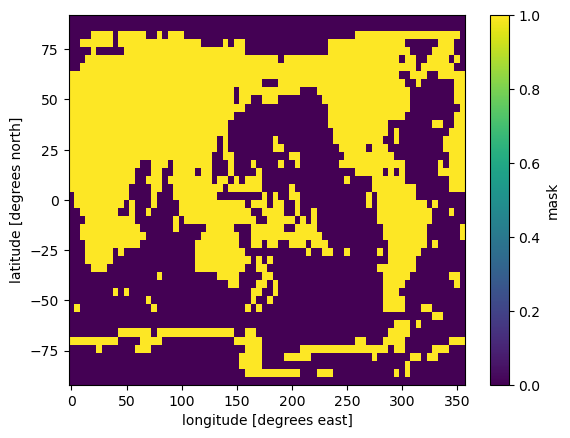

In [23]:
target_dataset = clm_target_surfdata_file.rename_dims(dims_dict={'lsmlat':'latitude','lsmlon':'longitude'})
target_dataset['longitude'] = target_dataset.LONGXY.isel(latitude=0)
target_dataset['latitude'] = target_dataset.LATIXY.isel(longitude=0)

target_dataset["mask"] = target_dataset["PCT_NATVEG"]> 0.
target_dataset["mask"].plot()

/Users/CDKoven/miniforge3/envs/xesmf/lib/python3.10/site-packages/xesmf/backend.py:56: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')


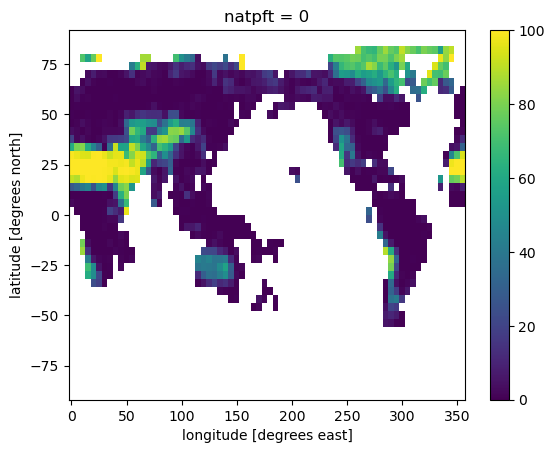

In [24]:
regridder_bareground = xe.Regridder(bareground_dataset, target_dataset, "conservative_normed")

bareground_data_regridded = regridder_bareground(bareground_dataset['bareground'])
bareground_data_regridded.plot()

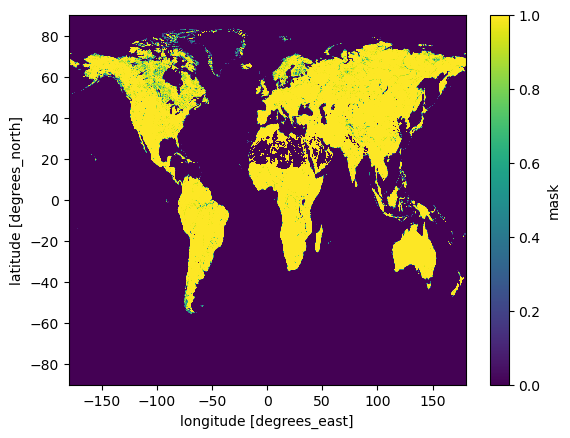

In [25]:
## construct a union of four possible masking conditions:
## (1) the ice/water mask
## (2) where the bare ground mask has Nan values
## (3) where the land is 100% bare ground
## (4) where there is missing data in the primary and secondary lands

#primary_secondary_pft_percent_dataset['primary_secondary_pft_percent'].plot(x='lon',y='lat',col='natpft',col_wrap=4)
mask_primarysecondary = (primary_secondary_pft_percent_dataset['primary_secondary_pft_percent'].sum(dim='natpft') == 0.)
primary_secondary_pft_percent_dataset['mask'] = (1 - icewatermask) * (1 - mask_baregroundnan) * (1-mask_allbareground) * (1-mask_primarysecondary)
primary_secondary_pft_percent_dataset['mask'].plot()


In [26]:
regridder_primsec = xe.Regridder(primary_secondary_pft_percent_dataset, target_dataset, "conservative_normed")

primsec_data_regridded = regridder_primsec(primary_secondary_pft_percent_dataset['primary_secondary_pft_percent'])


/Users/CDKoven/miniforge3/envs/xesmf/lib/python3.10/site-packages/xesmf/backend.py:56: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')
/Users/CDKoven/miniforge3/envs/xesmf/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


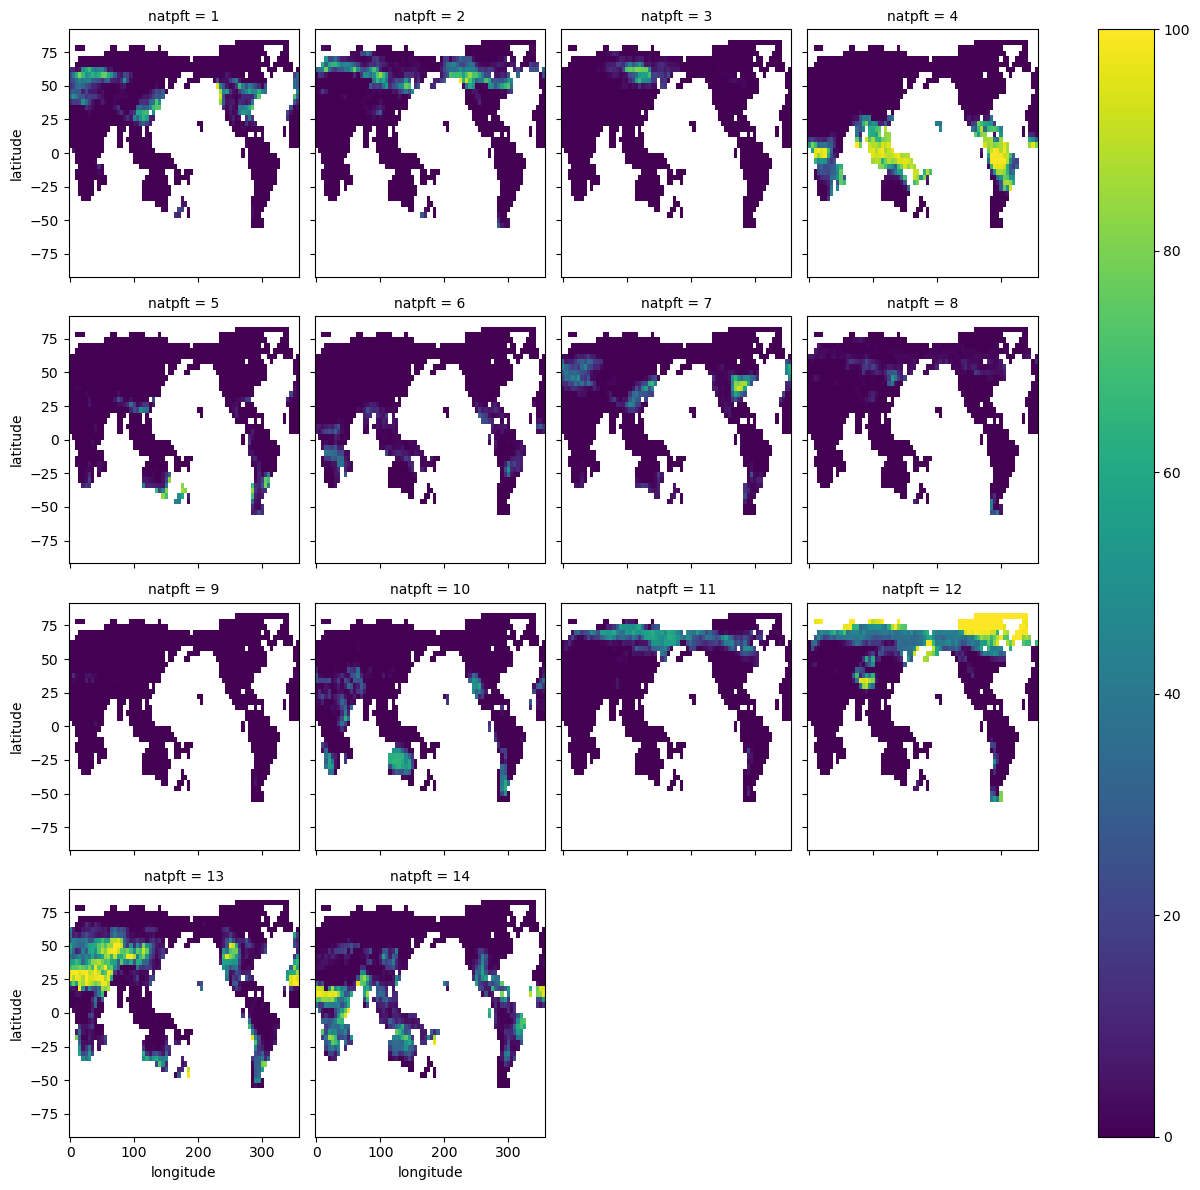

In [27]:
primsec_data_regridded.plot(x='longitude',y='latitude',col='natpft',col_wrap=4)

/Users/CDKoven/miniforge3/envs/xesmf/lib/python3.10/site-packages/xesmf/backend.py:56: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')


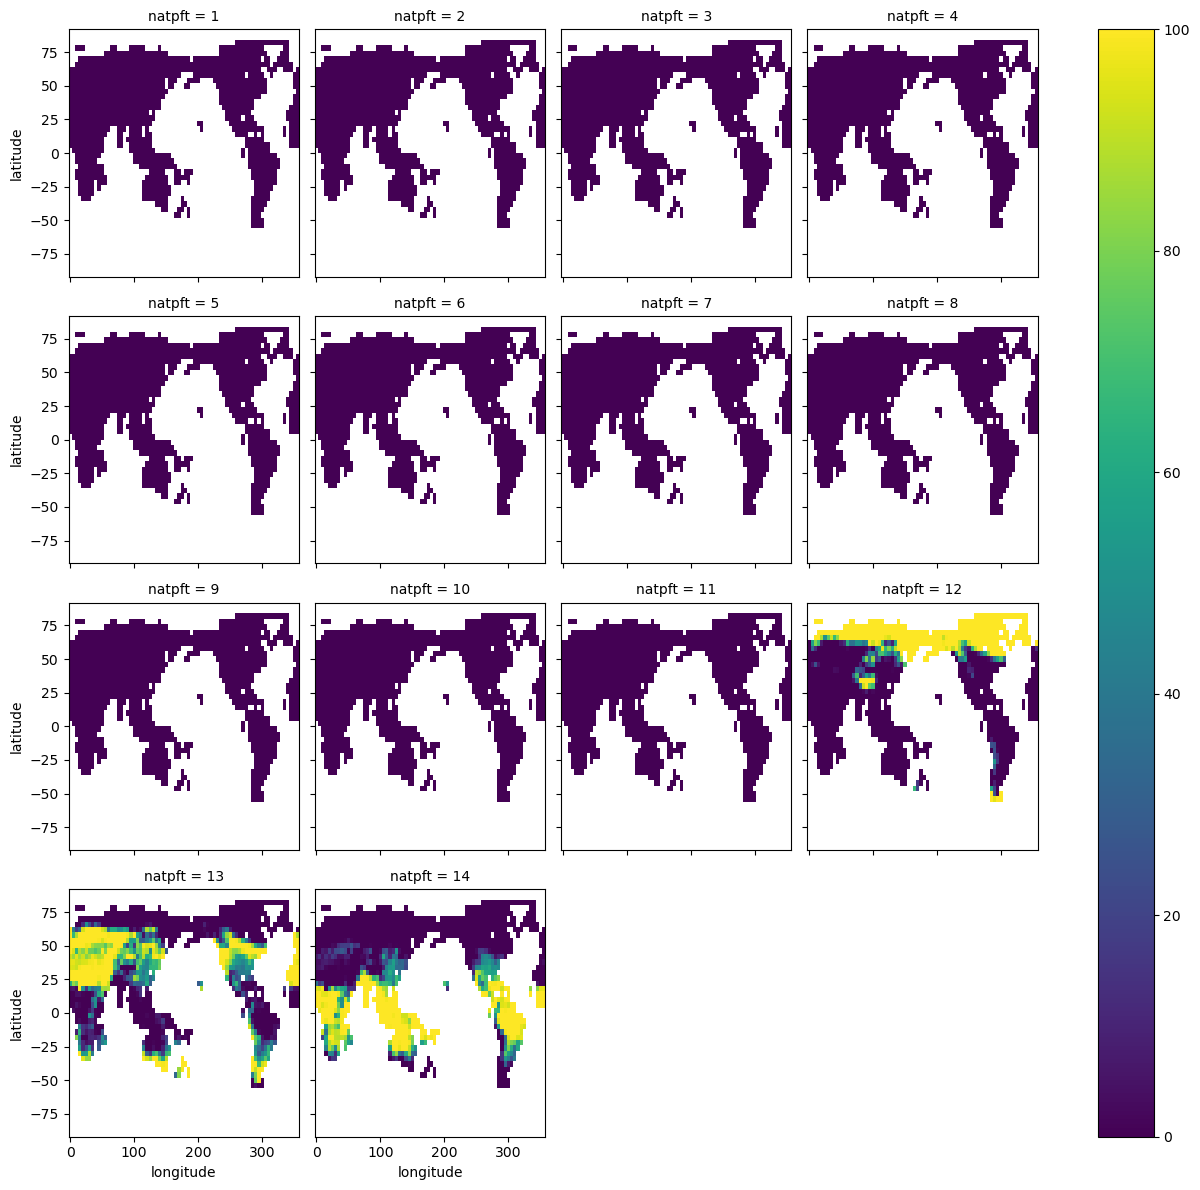

In [28]:
## construct the same union of four possible masking conditions for pasture
## (1) the ice/water mask
## (2) where the bare ground mask has Nan values
## (3) where the land is 100% bare ground
## (4) where there is missing data in the pasture lands

mask_pasture = (pasture_pft_percent_dataset['pasture_pft_percent'].sum(dim='natpft') == 0.)
pasture_pft_percent_dataset['mask'] = (1 - icewatermask) * (1 - mask_baregroundnan) * (1-mask_allbareground) * (1-mask_pasture)
#pasture_pft_percent_dataset['mask'].plot()

regridder_pasture = xe.Regridder(pasture_pft_percent_dataset, target_dataset, "conservative_normed")
pasture_data_regridded = regridder_pasture(pasture_pft_percent_dataset['pasture_pft_percent'])

pasture_data_regridded.plot(x='longitude',y='latitude',col='natpft',col_wrap=4)


/Users/CDKoven/miniforge3/envs/xesmf/lib/python3.10/site-packages/xesmf/backend.py:56: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')


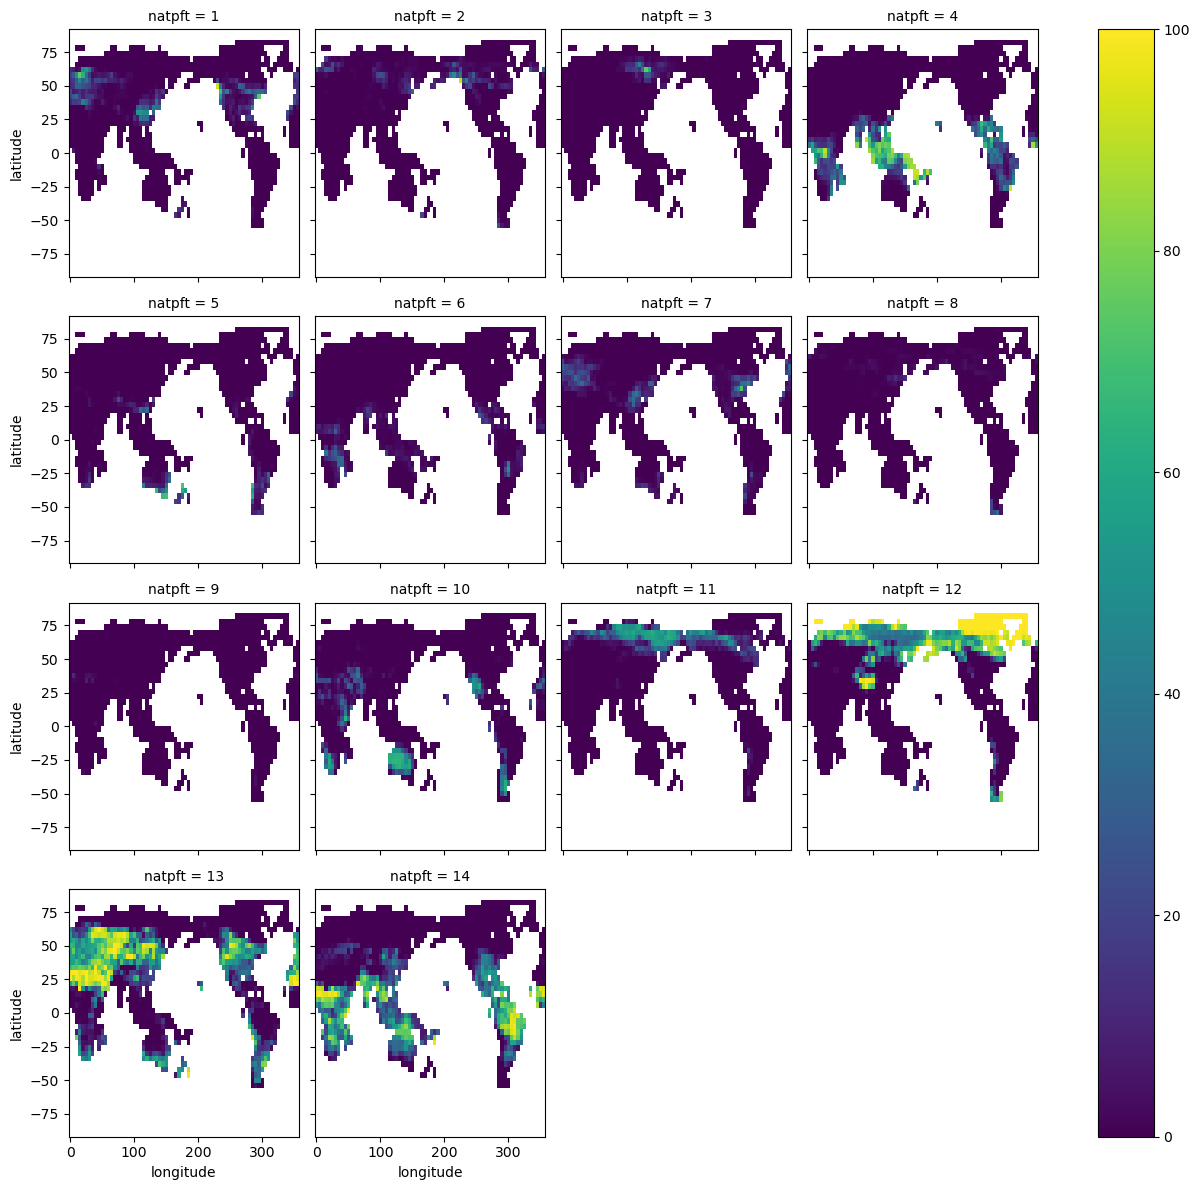

In [29]:
## construct the same union of four possible masking conditions for range
## (1) the ice/water mask
## (2) where the bare ground mask has Nan values
## (3) where the land is 100% bare ground
## (4) where there is missing data in the range lands

mask_range = (range_pft_percent_dataset['range_pft_percent'].sum(dim='natpft') == 0.)
range_pft_percent_dataset['mask'] = (1 - icewatermask) * (1 - mask_baregroundnan) * (1-mask_allbareground) * (1-mask_range)
#range_pft_percent_dataset['mask'].plot()

regridder_range = xe.Regridder(range_pft_percent_dataset, target_dataset, "conservative_normed")
range_data_regridded = regridder_range(range_pft_percent_dataset['range_pft_percent'])

range_data_regridded.plot(x='longitude',y='latitude',col='natpft',col_wrap=4)
